Problem Statement -
This project aims to develop a comprehensive retail analytics dashboard that provides actionable insights into sales performance, profitability, customer behavior, returns, and operational efficiency. By leveraging Power BI and DAX, the dashboard will help businesses identify high-performing regions, optimize shipping costs, analyze market trends, and enhance decision-making for improved overall store performance.

# Load Data


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Global Superstore.xls to Global Superstore.xls


In [5]:
import pandas as pd

In [6]:
filepath = "/content/Global Superstore.xls"
df = pd.read_excel(filepath)

In [7]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object  

# Data Cleaning

In [8]:
print("Missing values count:")
print(df.isnull().sum())

Missing values count:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# FEATURE ENGINEERIN

In [11]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# EXPLORATORY DATA ANALYSIS (EDA)

In [12]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Profit Margin (%)
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818,4.742960
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000,-473.354185
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,0.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,16.917784
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,33.313913
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,50.000000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810,46.566708


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-14-96bae3758bc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segment', palette='viridis')


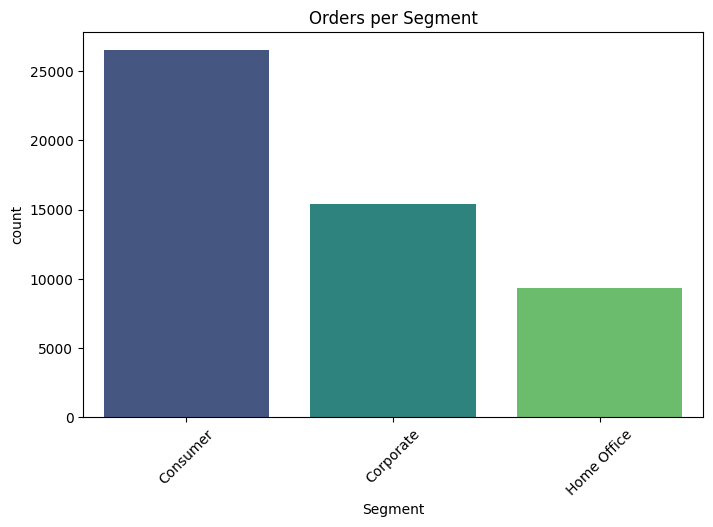

In [14]:
# Count of orders per segment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Segment', palette='viridis')
plt.title("Orders per Segment")
plt.xticks(rotation=45)
plt.show()

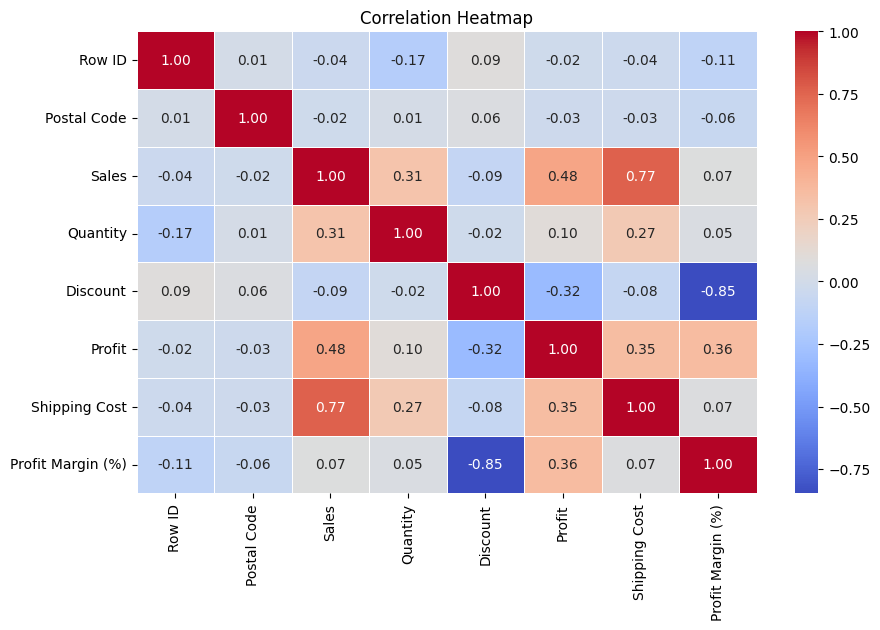

In [18]:
# CORRELATION HEATMAP
plt.figure(figsize=(10, 6))
# only numeric columns for this
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# SAVE CLEANED DATA

df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>